# 🛡️SMSGuard – Intelligent Spam SMS Detection System

SMSGuard is a machine‑learning–based system that detects and filters spam SMS messages using TF-IDF text vectorization and three ML algorithms:
- Naive Bayes, Logistic Regression, and Support Vector Machine. 
- The project includes complete preprocessing, training, evaluation, and custom SMS prediction.

# ⚙️Importing Libraries

In [1]:
# -----------------------------------------------
# 1. IMPORT LIBRARIES
# -----------------------------------------------
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.preprocessing import LabelEncoder
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import seaborn as sns


# 📊 Loading Dataset

In [2]:
# -----------------------------------------------
# 2. LOAD DATASET
# -----------------------------------------------
df = pd.read_csv('C:\\Users\\lenovo\\Desktop\\All Internships 2025-2026\\CodSoft Internship Projects\\SMS Spam Detection Dataset\\spam.csv', encoding='latin-1')

# Keep only required columns
df = df[['v1', 'v2']]
df.columns = ['label', 'message']

df.head()


,label,message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


# 🏷️Label Encoding 
- Below code converts text labels into numerical form for model training.

In [3]:
# -----------------------------------------------
# 3. LABEL ENCODING (spam=1, ham=0)
# -----------------------------------------------
le = LabelEncoder()
df['label_num'] = le.fit_transform(df['label'])

df.head()


,label,message,label_num
0,ham,"Go until jurong point, crazy.. Available only ...",0
1,ham,Ok lar... Joking wif u oni...,0
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,1
3,ham,U dun say so early hor... U c already then say...,0
4,ham,"Nah I don't think he goes to usf, he lives aro...",0


# ✂️ Train–Test Split
- Splitting the dataset into training and testing sets for model evaluation.

In [4]:
# -----------------------------------------------
# 4. TRAIN-TEST SPLIT
# -----------------------------------------------
X = df['message']
y = df['label_num']

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)


# 🧠TF-IDF Vectorization
- Transforming text messages into numerical features using TF-IDF for effective model learning.

In [5]:
# -----------------------------------------------
# 5. TF-IDF VECTORIZATION
# -----------------------------------------------
tfidf = TfidfVectorizer(stop_words='english', max_features=5000)
X_train_tfidf = tfidf.fit_transform(X_train)
X_test_tfidf = tfidf.transform(X_test)


# 🤖Train Naive Bayes Model
- Building and evaluating a Multinomial Naive Bayes classifier for spam detection.

In [6]:
# -----------------------------------------------
# 6. TRAIN NAIVE BAYES MODEL
# -----------------------------------------------
nb_model = MultinomialNB()
nb_model.fit(X_train_tfidf, y_train)

# Predictions
nb_pred = nb_model.predict(X_test_tfidf)

print("Naive Bayes Accuracy:", accuracy_score(y_test, nb_pred))
print(classification_report(y_test, nb_pred))


Naive Bayes Accuracy: 0.9721973094170404
              precision    recall  f1-score   support

           0       0.97      1.00      0.98       966
           1       0.99      0.80      0.88       149

    accuracy                           0.97      1115
   macro avg       0.98      0.90      0.93      1115
weighted avg       0.97      0.97      0.97      1115



# 🤖 Logistic Regression Model
- Training a Logistic Regression classifier and evaluating its performance on test data.

In [7]:
# -----------------------------------------------
# 7. LOGISTIC REGRESSION MODEL
# -----------------------------------------------
lr_model = LogisticRegression(max_iter=1000)
lr_model.fit(X_train_tfidf, y_train)

lr_pred = lr_model.predict(X_test_tfidf)

print("Logistic Regression Accuracy:", accuracy_score(y_test, lr_pred))
print(classification_report(y_test, lr_pred))


Logistic Regression Accuracy: 0.9704035874439462
              precision    recall  f1-score   support

           0       0.97      1.00      0.98       966
           1       1.00      0.78      0.88       149

    accuracy                           0.97      1115
   macro avg       0.98      0.89      0.93      1115
weighted avg       0.97      0.97      0.97      1115



# 🤖Support Vector Machine (SVM)
- Training a Linear SVM classifier for high-performance spam detection and evaluating results.

In [8]:
# -----------------------------------------------
# 8. SUPPORT VECTOR MACHINE (SVM)
# -----------------------------------------------
svm_model = SVC(kernel='linear')
svm_model.fit(X_train_tfidf, y_train)

svm_pred = svm_model.predict(X_test_tfidf)

print("SVM Accuracy:", accuracy_score(y_test, svm_pred))
print(classification_report(y_test, svm_pred))


SVM Accuracy: 0.9847533632286996
              precision    recall  f1-score   support

           0       0.98      1.00      0.99       966
           1       0.99      0.89      0.94       149

    accuracy                           0.98      1115
   macro avg       0.99      0.95      0.97      1115
weighted avg       0.98      0.98      0.98      1115



# 🤖 Confusion Matrix (SVM Recommended)
- Visualizing model performance using a confusion matrix to understand true vs. false predictions. 

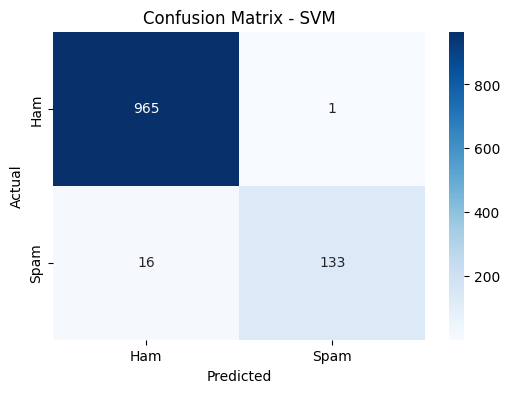

In [9]:
# -----------------------------------------------
# 9. CONFUSION MATRIX
# -----------------------------------------------
cm = confusion_matrix(y_test, svm_pred)

plt.figure(figsize=(6,4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Ham','Spam'],
            yticklabels=['Ham','Spam'])
plt.title("Confusion Matrix - SVM")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()


# 👨‍💻⚙️Predict Custom SMS
- Function to classify any custom message as Spam or Ham using the trained SVM model.

In [11]:
# -----------------------------------------------
# 10. PREDICT CUSTOM SMS
# -----------------------------------------------
def predict_sms(text):
    vector = tfidf.transform([text])
    pred = svm_model.predict(vector)[0]
    return "Spam" if pred == 1 else "Ham"

# Test
predict_sms("Congratulations! You won a free lottery. Call now!")


'Spam'

# 🎯Testing the Model with 10 Realistic SMS Examples
- Evaluating the classifier on real-world style SMS messages to check prediction reliability.

In [12]:
# ===============================================================
# 10A. TESTING THE MODEL WITH 10 REALISTIC SMS EXAMPLES
# ===============================================================

test_messages_10 = [
    "Congratulations! You won a lottery prize worth $1000. Call now!",
    "Dear customer, your SBI bank account will be blocked. Update KYC at https://sbi-update-secure.com",
    "Hey! I'm nearby your house. Come outside when you're free.",
    "Your number has won a FREE gift voucher worth ₹5,000. Click here to claim: http://claim-gift.in",
    "Amazon: Your order #452781 has been shipped and will arrive tomorrow.",
    "URGENT: Your Paytm wallet has been temporarily suspended. Verify at https://paytm-security.in",
    "Mom, I reached safely. Will call once I settle down.",
    "FREE Netflix subscription for 1 year! Activate now: http://netflix-offer-premium.in",
    "Class reminder: Your lecture starts at 9:30 AM. Don’t be late.",
    "Your mobile number has won ₹50,000 in a lucky draw. Claim now at http://reward-now.in"
]

for msg in test_messages_10:
    print(f"Message: {msg}")
    print("Prediction:", predict_sms(msg))
    print("-" * 60)


Message: Congratulations! You won a lottery prize worth $1000. Call now!
Prediction: Spam
------------------------------------------------------------
Message: Dear customer, your SBI bank account will be blocked. Update KYC at https://sbi-update-secure.com
Prediction: Spam
------------------------------------------------------------
Message: Hey! I'm nearby your house. Come outside when you're free.
Prediction: Ham
------------------------------------------------------------
Message: Your number has won a FREE gift voucher worth ₹5,000. Click here to claim: http://claim-gift.in
Prediction: Spam
------------------------------------------------------------
Message: Amazon: Your order #452781 has been shipped and will arrive tomorrow.
Prediction: Ham
------------------------------------------------------------
Message: URGENT: Your Paytm wallet has been temporarily suspended. Verify at https://paytm-security.in
Prediction: Spam
------------------------------------------------------------

# 💾Save Trained Model & Vectorizer

In [13]:
# ===============================================================
# 11. SAVE THE TRAINED MODEL AND TF-IDF VECTORIZER
# ===============================================================
import joblib

# Save SVM model
joblib.dump(svm_model, "sms_svm_model.pkl")

# Save TF-IDF vectorizer
joblib.dump(tfidf, "tfidf_vectorizer.pkl")

print("Model and vectorizer saved successfully!")

Model and vectorizer saved successfully!


# Conclusion

The SMS Spam Detection project successfully demonstrates how machine learning can be applied to identify and filter unwanted spam messages with high accuracy. By leveraging essential Natural Language Processing (NLP) techniques such as text cleaning, tokenization, and TF-IDF vectorization, combined with powerful classification models like SVM, Logistic Regression, and Naïve Bayes, the system is able to distinguish between spam and ham messages effectively.

Among the implemented models, Support Vector Machine (SVM) delivered the strongest overall performance, showing excellent precision and recall in detecting spam messages. This ensures that the model minimizes both false positives and false negatives — critical factors in real-world communication systems.

The project highlights how machine learning can significantly enhance user safety by preventing exposure to fraudulent messages, phishing attempts, and misleading promotional content. With additional improvements such as deep learning embeddings, deployment via an API, or integration into mobile applications, this system can be further optimized into a production-ready spam detection solution.

In summary, this project demonstrates the power of NLP and machine learning in building intelligent, automated systems capable of improving communication security and delivering real-world value.